<a href="https://colab.research.google.com/github/kalleo1996/FYP-/blob/main/Symptom_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U spacy

!python -m spacy download en_core_web_lg

!pip install langdetect

!pip install contractions

     |████████████████████████████████| 777.4 MB 5.4 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
!pip install scikit-multilearn

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#importing libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/anxiety-first250.csv',sep = ';')
df.head(10)

,Title,Comment,code,symptom,illness
0,What have other people's experiences been wrt ...,Quick question. For people who have been on an...,58,"anxiety(42),a complaint of blushing, hand trem...",Anxiety
1,Anxious when there's nothing to worry about; p...,This problem happens randomly and sometimes wh...,16,being incomprehensible (16),Anxiety
2,I am fighting against anything and everything ...,I am fighting against my own head\n\nI am figh...,"29,32,34,57","delusions(29),depressed mood(32),increased fat...",Anxiety
3,DAE have overwhelming mood swings?,Allow me to elaborate: You're sitting at your ...,54,Panic attack(54),Anxiety
4,Am I just being paranoid?,I constantly worry and over think about many s...,39,delusions(39),Anxiety
5,"Recommendations for relaxing music, podcasts, ...","Been struggling more with anxiety lately, and ...",53,autonomic overactivity/autonomic symptoms(53),Anxiety
6,Does anyone else feel as if they're just bette...,"Hey everyone, \n\nSo I've been dealing with IB...",57,"Social phobia(57),",Anxiety
7,Buspar or propranolol?,"Sorry if this is the wrong place to ask, but.....",0,No_symptom,Anxiety
8,Coping techniques?,I'm a freshman in high school. My boyfriend is...,63,apprehesion(63),Anxiety
9,Relationships. Please help.,"Hi friends, I'm very new to this subreddit, an...","58,53","a complaint of blushing, hand tremor, nausea, ...",Anxiety


In [ ]:
df['code']

0               58
1               16
2      29,32,34,57
3               54
4               39
          ...     
246             62
247             63
248             63
249              0
250             29
Name: code, Length: 251, dtype: object

In [ ]:
df.isnull().any().sum()

3

In [ ]:
df['code'].isnull().sum()

2

In [ ]:
print("code:",df["code"].unique())

code: ['58' '16' '29,32,34,57' '54' '39' '53' '57' '0' '63' '58,53'
 '49,63,62,39' '37,63' '56,57' '54,63' '54,53,62' '55,56,34' '36,63'
 '54,53' '46,55' '27,53' '57,63' '62,58' '59' '70,46' '29' '30,54' '56'
 '40,53,58,54,34,53,55,43' '54,36' '55' '53,57,58' '76,63'
 '36,37,38,63,43' '39,43,40,53' '63,54' '50,29,34'
 '39,77,54,57,64,63,36,59' '53,62' nan '53,76,63' '10' '54,53,36,63' '76'
 '29,57,53,58,63' '62,21' '54,63,53,58' '63,40,44,43' '73' '53,58'
 '59,57,54' '62' '59,63' '63,56' '25' '39,46' '63,62' '40'
 '55,29,39,57,29' '55,39,63' '76,77' '63,57' '77' '58,53,63' '57,39,76,53'
 '64,63,56' '53,54' '56,46' '56,54,63' '40,62' '57,63,77' '53,40' '30'
 '58,53,63,57' '53,63' '46' '43,37,63' '54,57,63' '55,63' '36,63,32'
 '32,59,63' '36' '63,59' '58,62,40' '57,54' '62,58,29' '55,63,64,56'
 '39,32' '63,76,36,62,56' '73,64,43' '29,61,53' '62,63' '59,43' '34,35'
 '89,43,39' '37,40' '53,59' '59,53,63' '58,34' '40,43' '46,57,54' '41,57'
 '33' '63,58,53' '53,57' '63,38' '70,71,75' '54,43'

In [ ]:
df['code'].value_counts()

0           26
63          23
53          16
54          12
57           8
            ..
57,54        1
53,56,63     1
39,32        1
59,43        1
57,63,77     1
Name: code, Length: 130, dtype: int64

In [ ]:
df['code'].replace(np.NaN,'0')

0               58
1               16
2      29,32,34,57
3               54
4               39
          ...     
246             62
247             63
248             63
249              0
250             29
Name: code, Length: 251, dtype: object

In [ ]:
df['code'].value_counts()

0           26
63          23
53          16
54          12
57           8
            ..
57,54        1
53,56,63     1
39,32        1
59,43        1
57,63,77     1
Name: code, Length: 130, dtype: int64

In [ ]:
df = df.drop(columns=["symptom","illness"],axis=1)

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 250
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    249 non-null    object
 1   Comment  249 non-null    object
 2   code     249 non-null    object
dtypes: object(3)
memory usage: 7.8+ KB


In [ ]:
array2 = []

In [ ]:
for index, row in df.iterrows():
    
           splits =  row['code']
           print(splits)
           split2 =splits.split(',')
           for words in split2:
               if array2.count(words) == 0:
                  array2.append(words)
                   
                   

58
16
29,32,34,57
54
39
53
57
0
63
58,53
63
49,63,62,39
37,63
54
56,57
54,63
54,53,62
53
55,56,34
36,63
0
54,53
46,55
27,53
57,63
63
63
62,58
59
70,46
29
30,54
56
40,53,58,54,34,53,55,43
54,36
56
0
56
63
55
53,57,58
57
76,63
36,37,38,63,43
39,43,40,53
63,54
50,29,34
39,77,54,57,64,63,36,59
53,62
63
53,76,63
53
63
54,53
10
54,53,36,63
76
57
29,57,53,58,63
62,21
55
54,63,53,58
53
53
0
53
63,40,44,43
73
63
0
53,58
54,63
59,57,54
62
63
54
59,63
53
63,56
53
56
58
63
25
76
57,63
39,46
56
63
63,62
59
40
55,29,39,57,29
55,39,63
76,77
63,57
53
77
57
58,53,63
57,39,76,53
64,63,56
53,54
56,46
53
56
53
56,54,63
40,62
57
57,63,77
53,40
30
58,53,63,57
53,63
54
46
43,37,63
63
54,57,63
55,63
36,63,32
32,59,63
36
63,59
54,63
36
58,62,40
57,54
62,58,29
29
55,63,64,56
29
63
39,32
46,55
54
63,76,36,62,56
63
0
0
53,63
0
63,57
36
54
73,64,43
29,61,53
62,63
58
59,43
63,54
0
0
34,35
54
89,43,39
37,40
53,59
59,53,63
0
59,63
54,53
58,34
57
0
40,43
53
63
0
55
46,57,54
41,57
0
33
53
63,58,53
53,57
0
63
54,63
63,3

In [ ]:
array2

['58',
 '16',
 '29',
 '32',
 '34',
 '57',
 '54',
 '39',
 '53',
 '0',
 '63',
 '49',
 '62',
 '37',
 '56',
 '55',
 '36',
 '46',
 '27',
 '59',
 '70',
 '30',
 '40',
 '43',
 '76',
 '38',
 '50',
 '77',
 '64',
 '10',
 '21',
 '44',
 '73',
 '25',
 '61',
 '35',
 '89',
 '41',
 '33',
 '71',
 '75',
 '1']

In [ ]:
len(array2)

42

In [ ]:
df2 = pd.DataFrame(columns=array2)
df2

,58,16,29,32,34,57,54,39,53,0,63,49,62,37,56,55,36,46,27,59,70,30,40,43,76,38,50,77,64,10,21,44,73,25,61,35,89,41,33,71,75,1


In [ ]:
df_row = pd.concat([df, df2])

df_row

,Title,Comment,code,58,16,29,32,34,57,54,39,53,0,63,49,62,37,56,55,36,46,27,59,70,30,40,43,76,38,50,77,64,10,21,44,73,25,61,35,89,41,33,71,75,1
0,What have other people's experiences been wrt ...,Quick question. For people who have been on an...,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Anxious when there's nothing to worry about; p...,This problem happens randomly and sometimes wh...,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am fighting against anything and everything ...,I am fighting against my own head\n\nI am figh...,"29,32,34,57",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DAE have overwhelming mood swings?,Allow me to elaborate: You're sitting at your ...,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Am I just being paranoid?,I constantly worry and over think about many s...,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,TIL: Sitting still a lot = more anxiety,After coming home from a NYE party where I was...,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,Anxiety Reliefs?,"I've been dealing with anxiety for years, and ...",63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,Having A Little Breakdown,"Hey guys,\n\nSo today is my birthday, I'm 29 a...",63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,Are Meds worth it?,"First of all, I'm so glad I found this communi...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for index, row in df_row.iterrows():
    
           splits =  row['code']
           print(splits)
           split2 =splits.split(',')
           for words in split2:
             row[words]=1
   

58
16
29,32,34,57
54
39
53
57
0
63
58,53
63
49,63,62,39
37,63
54
56,57
54,63
54,53,62
53
55,56,34
36,63
0
54,53
46,55
27,53
57,63
63
63
62,58
59
70,46
29
30,54
56
40,53,58,54,34,53,55,43
54,36
56
0
56
63
55
53,57,58
57
76,63
36,37,38,63,43
39,43,40,53
63,54
50,29,34
39,77,54,57,64,63,36,59
53,62
63
53,76,63
53
63
54,53
10
54,53,36,63
76
57
29,57,53,58,63
62,21
55
54,63,53,58
53
53
0
53
63,40,44,43
73
63
0
53,58
54,63
59,57,54
62
63
54
59,63
53
63,56
53
56
58
63
25
76
57,63
39,46
56
63
63,62
59
40
55,29,39,57,29
55,39,63
76,77
63,57
53
77
57
58,53,63
57,39,76,53
64,63,56
53,54
56,46
53
56
53
56,54,63
40,62
57
57,63,77
53,40
30
58,53,63,57
53,63
54
46
43,37,63
63
54,57,63
55,63
36,63,32
32,59,63
36
63,59
54,63
36
58,62,40
57,54
62,58,29
29
55,63,64,56
29
63
39,32
46,55
54
63,76,36,62,56
63
0
0
53,63
0
63,57
36
54
73,64,43
29,61,53
62,63
58
59,43
63,54
0
0
34,35
54
89,43,39
37,40
53,59
59,53,63
0
59,63
54,53
58,34
57
0
40,43
53
63
0
55
46,57,54
41,57
0
33
53
63,58,53
53,57
0
63
54,63
63,3

In [ ]:
df_row=df_row.replace(np.NaN,0)

In [ ]:
df_row

,Title,Comment,code,58,16,29,32,34,57,54,39,53,0,63,49,62,37,56,55,36,46,27,59,70,30,40,43,76,38,50,77,64,10,21,44,73,25,61,35,89,41,33,71,75,1
0,What have other people's experiences been wrt ...,Quick question. For people who have been on an...,58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Anxious when there's nothing to worry about; p...,This problem happens randomly and sometimes wh...,16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,I am fighting against anything and everything ...,I am fighting against my own head\n\nI am figh...,"29,32,34,57",0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,DAE have overwhelming mood swings?,Allow me to elaborate: You're sitting at your ...,54,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Am I just being paranoid?,I constantly worry and over think about many s...,39,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,TIL: Sitting still a lot = more anxiety,After coming home from a NYE party where I was...,62,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
247,Anxiety Reliefs?,"I've been dealing with anxiety for years, and ...",63,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
248,Having A Little Breakdown,"Hey guys,\n\nSo today is my birthday, I'm 29 a...",63,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
249,Are Meds worth it?,"First of all, I'm so glad I found this communi...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_row.isnull().any()

Title      False
Comment    False
code       False
58         False
16         False
29         False
32         False
34         False
57         False
54         False
39         False
53         False
0          False
63         False
49         False
62         False
37         False
56         False
55         False
36         False
46         False
27         False
59         False
70         False
30         False
40         False
43         False
76         False
38         False
50         False
77         False
64         False
10         False
21         False
44         False
73         False
25         False
61         False
35         False
89         False
41         False
33         False
71         False
75         False
1          False
dtype: bool

# Preprocessing 

In [ ]:
## for data
import pandas as pd
import collections
import json
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
## for text processing
import re
import nltk
## for language detection
import langdetect 
## for sentiment
from textblob import TextBlob
## for ner
import spacy
## for vectorizer
from sklearn import feature_extraction, manifold
## for word embedding
import gensim.downloader as gensim_api
## for topic modeling
import gensim

from bs4 import BeautifulSoup

In [ ]:
df_row["post"] = df_row["Title"] + " "+df_row["Comment"] 

In [ ]:
df_row["post"].head(1)

0    What have other people's experiences been wrt ...
Name: post, dtype: object

In [ ]:
# function to remove HTML tags
def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()

In [ ]:
df_row["removehtml"] = df_row["post"].apply(remove_html_tags)

In [ ]:
print(df_row["removehtml"].head(1))

0    What have other people's experiences been wrt ...
Name: removehtml, dtype: object


In [ ]:
pd.options.display.max_colwidth = 100

In [ ]:
# imports
import unicodedata
# function to remove accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

In [ ]:
df_row["remove_accented_chars"] = df_row["removehtml"].apply(remove_accented_chars)

In [ ]:
print(df_row["remove_accented_chars"].head(1) )

0    What have other people's experiences been wrt increasing medication dosage? Quick question. For ...
Name: remove_accented_chars, dtype: object


Expanding Contractions

In [ ]:
# imports
import contractions
import re 
# function to expand contractions
def expand_contractions(text):
    new_text = contractions.fix(text)
    return new_text
# call function 

In [ ]:
df_row["expand_contractions"] = df_row["remove_accented_chars"].apply(expand_contractions)

In [ ]:
print(df_row["expand_contractions"].head(1))

0    What have other people's experiences been wrt increasing medication dosage? Quick question. For ...
Name: expand_contractions, dtype: object


Removing Special characters

In [ ]:
import re
# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)

In [ ]:
df_row["remove_special_characters"] = df_row["expand_contractions"].apply(remove_special_characters)

In [ ]:
print(df_row["remove_special_characters"].head(1))

0    What have other people's experiences been wrt increasing medication dosage? Quick question. For ...
Name: remove_special_characters, dtype: object


Removing Numbers

In [ ]:
import re
# function to remove numbers
def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

In [ ]:
df_row["remove_numbers"] = df_row["remove_special_characters"].apply(remove_numbers)

In [ ]:
print(df_row["remove_numbers"].head(1))

0    What have other people's experiences been wrt increasing medication dosage? Quick question. For ...
Name: remove_numbers, dtype: object


Spelling correction

In [ ]:
from textblob import TextBlob
# df['text_rare'].apply(lambda x: str(TextBlob(x).correct()))

df_row["correctiontext"] = df_row["remove_numbers"].apply(lambda x: str(TextBlob(x).correct()))

In [ ]:
print(df_row["correctiontext"].head(1))

0    That have other people's experiences been wet increasing meditation dosage? Quick question. For ...
Name: correctiontext, dtype: object


Removing URLs

In [ ]:
# Function for url's
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
# Examples
text = "This is my website, https://www.abc.com"
remove_urls(text)
#Passing the function to 'text_rare'
 #df['text_rare'] = df['text_rare'].apply(remove_urls)

'This is my website, '

In [ ]:
df_row["remove_urls"] = df_row["correctiontext"].apply(remove_urls)
print(df_row["remove_urls"].head(1))

0    That have other people's experiences been wet increasing meditation dosage? Quick question. For ...
Name: remove_urls, dtype: object


Lemmatisation

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk



def lemmatize_text(text):
    lst_txt = text.split()
    lem = nltk.stem.wordnet.WordNetLemmatizer()
    lst_txt = [lem.lemmatize(word,pos="v") for word in lst_txt]
    txt = " ".join(lst_txt)
    return txt

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
punctuations="?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)

sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word,pos="v")))

Word                Lemma               
He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time                time                
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
Sun                 Sun                 


In [ ]:
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word, pos="v")))

He                  He                  
was                 be                  
running             run                 
and                 and                 
eating              eat                 
at                  at                  
same                same                
time                time                
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
Sun                 Sun                 


In [ ]:
 df_row["get_lem"] = df_row["remove_urls"].apply(lemmatize_text)

In [ ]:
print( df_row["get_lem"].head(1))

0    That have other people's experience be wet increase meditation dosage? Quick question. For peopl...
Name: get_lem, dtype: object


Removing White spaces 

In [ ]:
# imports
import re
# function to remove special characters
def remove_extra_whitespace_tabs(text):
    #pattern = r'^\s+$|\s+$'
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()


In [ ]:
df_row["removewhitespace_tabs"] = df_row["get_lem"].apply(remove_extra_whitespace_tabs)

In [ ]:
print(df_row["removewhitespace_tabs"].head(1))

0    That have other people's experience be wet increase meditation dosage? Quick question. For peopl...
Name: removewhitespace_tabs, dtype: object


# Lowercase
Changing case to lower can be achieved by using lower function.

In [ ]:
# function to remove special characters
def to_lowercase(text):
    return text.lower()

In [ ]:
df_row["to_lowercase"] = df_row["removewhitespace_tabs"].apply(to_lowercase)

In [ ]:
print(df_row["to_lowercase"].head(1))

0    that have other people's experience be wet increase meditation dosage? quick question. for peopl...
Name: to_lowercase, dtype: object


In [ ]:
nltk.download('stopwords')
import nltk


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:


stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('anxiety')
STOPWORDS = set(stopwords)



In [ ]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'anxiety',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',

In [ ]:
# Function to remove the stopwords
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [ ]:
# Applying the stopwords to 'text_punct' and store into 'text_stop'
df_row["text_stop"] = df_row["to_lowercase"].apply(stopwords)


Avoiding Negative Words 

In [ ]:
STOPWORDSx2 = STOPWORDS 
print(STOPWORDSx2)

{'who', 'themselves', 'doesn', 'which', 'your', 'where', 'few', 'but', 'be', 'does', 'wouldn', "hadn't", "hasn't", 'other', 'anxiety', 'is', 'in', 'its', 'of', "should've", 'me', 'shouldn', 'won', 'his', 'haven', 'off', "didn't", 'below', "mightn't", 'ma', 'once', 'such', 'him', 'my', 'was', 'm', 'weren', 'yours', "she's", "couldn't", "you're", 'ain', 'were', 'needn', 'ours', 'while', 'just', 'down', "won't", 'should', 'all', 'd', 'been', 'why', 'are', 'theirs', 'that', 'and', 'them', 'for', 'i', "aren't", 'after', 'you', 'before', 'did', 'same', 'don', "shouldn't", 'during', 'yourself', 'too', 'hers', 'has', 'between', 'with', 'those', 'any', "wasn't", 'her', 'nor', 'then', 'at', 'until', 'what', "it's", "you'd", "don't", 'each', 'doing', 'have', 'an', "isn't", 'it', 'so', 'as', 'by', "haven't", 't', 're', 'himself', 'itself', 'wasn', 'further', 'hasn', 'whom', 'had', 'we', "needn't", "you'll", 'out', 'again', "shan't", 'more', 'no', "wouldn't", 'aren', 'having', 'here', 'being', 've'

In [ ]:
arr=['not','mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', 
"weren't", 'won', "won't", 'wouldn', "wouldn't",'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",'no',
 'nor']

for data in arr:
  STOPWORDSx2.remove(data)

In [ ]:
# Function to remove the stopwords
def stopwords2(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDSx2])

In [ ]:
# Applying the stopwords to 'text_punct' and store into 'text_stop'
df_row["text_stopnoNegative"] = df_row["to_lowercase"].apply(stopwords2)
df_row["text_stopnoNegative"].head(1)

0    people's experience wet increase meditation dosage? quick question. people antidepressant help o...
Name: text_stopnoNegative, dtype: object

In [ ]:
print(df_row["text_stopnoNegative"].head(1))

0    people's experience wet increase meditation dosage? quick question. people antidepressant help o...
Name: text_stopnoNegative, dtype: object


Removing Punctuations 

In [ ]:
# imports
import string
# function to remove punctuation
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text
# call functiona
remove_punctuation('Article: @First sentence of some, {important} article having lot of ~ punctuations. And another one;!')

'Article First sentence of some important article having lot of  punctuations And another one'

In [ ]:
df_row["remove_punctuation"] = df_row["text_stopnoNegative"].apply(remove_punctuation)

In [ ]:
New_df = df_row[['remove_punctuation','58',	'16',	'29',	'32',	'34',	'57',	'54',	'39',	'53' ,	'0' ,	'63' ,	'49' ,	'62' ,	'37' ,	'56' ,	'55' ,	'36' ,	'46' ,	'27' ,	'59' ,	'70' ,	'30',	'40' ,	'43' ,	'76',	'38' ,	'50' ,	'77' ,	'64'	,'10',	'21' ,	'44' ,	'73' ,	'25' ,	'61'	,'35'	,'89'	,'41'	,'33',	'71'	, '75',	'1'	]].copy()
New_df.head()

,remove_punctuation,58,16,29,32,34,57,54,39,53,0,63,49,62,37,56,55,36,46,27,59,70,30,40,43,76,38,50,77,64,10,21,44,73,25,61,35,89,41,33,71,75,1
0,peoples experience wet increase meditation dosage quick question people antidepressant help ok g...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,anxious nothing worry about probably search things worry problem happen random sometimes somethi...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,fight anything everything time feed fight head fight world media saw social structures religion ...,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,dae overwhelm mood swing allow elaborate sit desk computer whatever span of would say hour slowl...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,paranoid constantly worry think many silly things especially internet wise feel like trace perso...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator
import seaborn as sns
import re
import os
import csv

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


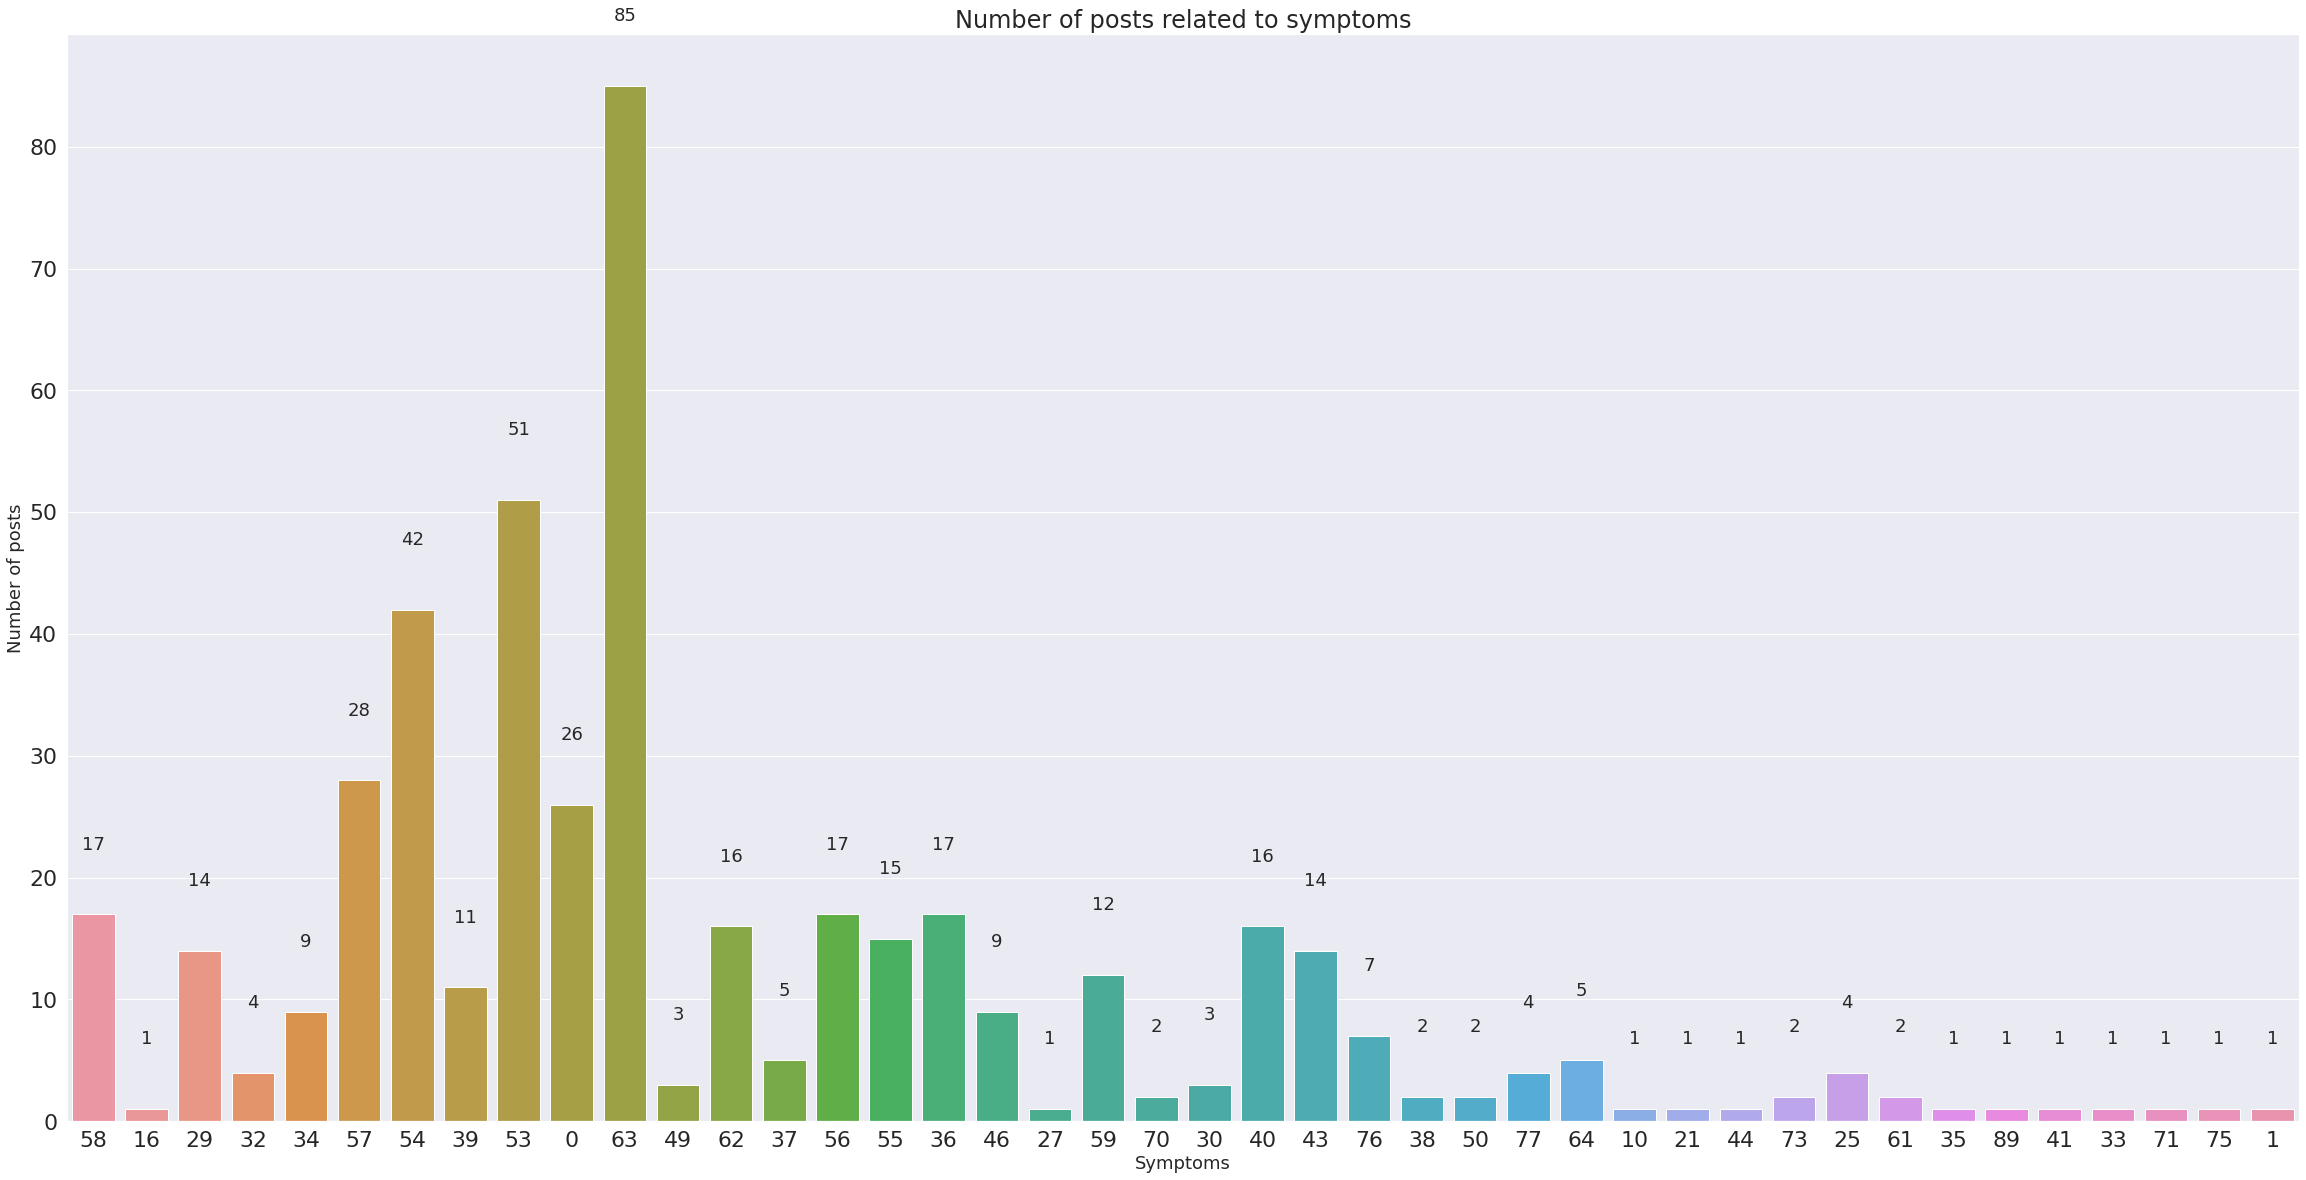

In [ ]:
sns.set(font_scale = 2)
plt.figure(figsize=(40,20))

ax= sns.barplot(array2, New_df.iloc[:,1:].sum().values)

plt.title("Number of posts related to symptoms", fontsize=24)
plt.ylabel('Number of posts', fontsize=18)
plt.xlabel('Symptoms', fontsize=18)

#adding the text labels
rects = ax.patches
labels = New_df.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

In [ ]:
categoryarr=[]

In [ ]:
for category in array2:
       count =0
       for index, row in New_df.iterrows():
          if (row[category] == 1):
                   count = count + 1
       if (count <= 7):
                   New_df.drop(category,axis='columns', inplace=True)
       
          
   

In [ ]:
New_df

,remove_punctuation,58,29,34,57,54,39,53,0,63,62,56,55,36,46,59,40,43
0,peoples experience wet increase meditation dosage quick question people antidepressant help ok g...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,anxious nothing worry about probably search things worry problem happen random sometimes somethi...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,fight anything everything time feed fight head fight world media saw social structures religion ...,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,dae overwhelm mood swing allow elaborate sit desk computer whatever span of would say hour slowl...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,paranoid constantly worry think many silly things especially internet wise feel like trace perso...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,til sitting still lot come home nye party strangely pleasant sober up ak no hanover headache any...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
247,beliefs deal years time manageable time not sure understand talk therapy try meditation try dist...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
248,little breakdown key guns today birthday and get month relationship glad not go anywhere want so...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
249,beds worth it first all glad find community make realize not alone helpful read gun sharing long...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Train and Test Split 

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(New_df, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(174, 18)
(75, 18)


In [ ]:
# train_x = train['remove_punctuation']
# test_x = test['remove_punctuation']
# train_y  = train.drop(labels = ["remove_punctuation"], axis=1)
# test_y= test.drop(labels = ["remove_punctuation"], axis=1)


Here the preprocessing over 

In [ ]:
train_text = train['remove_punctuation']
test_text = test['remove_punctuation']

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(2,3))
vectorizer.fit(train_text)
vectorizer.fit(test_text)


TfidfVectorizer(ngram_range=(2, 3), strip_accents='unicode')

In [ ]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['remove_punctuation'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['remove_punctuation'], axis=1)

In [ ]:
x_train

<174x14281 sparse matrix of type '<class 'numpy.float64'>'
	with 2344 stored elements in Compressed Sparse Row format>

Multi label classification without PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [ ]:

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.12




In [ ]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [ ]:
# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.08




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
arr = ['58','29','34','57','54','39','53','0','63','62','56','55','36','46','59','40','43']

In [ ]:
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in arr:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing 58 comments...**
Test accuracy is 0.9733333333333334


**Processing 29 comments...**
Test accuracy is 0.9733333333333334


**Processing 34 comments...**
Test accuracy is 0.9466666666666667


**Processing 57 comments...**
Test accuracy is 0.92


**Processing 54 comments...**
Test accuracy is 0.7466666666666667


**Processing 39 comments...**
Test accuracy is 0.9866666666666667


**Processing 53 comments...**
Test accuracy is 0.7733333333333333


**Processing 0 comments...**
Test accuracy is 0.92


**Processing 63 comments...**
Test accuracy is 0.64


**Processing 62 comments...**
Test accuracy is 0.9066666666666666


**Processing 56 comments...**
Test accuracy is 0.96


**Processing 55 comments...**
Test accuracy is 0.92


**Processing 36 comments...**
Test accuracy is 0.8933333333333333


**Processing 46 comments...**
Test accuracy is 0.9866666666666667


**Processing 59 comments...**
Test accuracy is 0.9733333333333334


**Processing 40 comments...**
Test accuracy is 0.92

In [ ]:
# # example of a multi-label classification task
# from sklearn.datasets import make_multilabel_classification
# # define dataset
# X, y = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, n_labels=2, random_state=1)
# # summarize dataset shape
# print(X.shape, y.shape)
# # summarize first few examples
# for i in range(10):
# 	print(X[i], y[i])

In [ ]:

# # define the model
# model = Sequential()
# model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
# model.add(Dense(n_outputs, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

In [ ]:
SVC_pipeline = Pipeline([
              
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

In [ ]:
for category in arr:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(x_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing 58
Test accuracy is 0.9733333333333334
... Processing 29
Test accuracy is 0.9733333333333334
... Processing 34
Test accuracy is 0.9466666666666667
... Processing 57
Test accuracy is 0.92
... Processing 54
Test accuracy is 0.7466666666666667
... Processing 39
Test accuracy is 0.9866666666666667
... Processing 53
Test accuracy is 0.7733333333333333
... Processing 0
Test accuracy is 0.92
... Processing 63
Test accuracy is 0.64
... Processing 62
Test accuracy is 0.9066666666666666
... Processing 56
Test accuracy is 0.96
... Processing 55
Test accuracy is 0.92
... Processing 36
Test accuracy is 0.8933333333333333
... Processing 46
Test accuracy is 0.9866666666666667
... Processing 59
Test accuracy is 0.9733333333333334
... Processing 40
Test accuracy is 0.92
... Processing 43
Test accuracy is 0.9333333333333333


Models  with SVD

In [ ]:
 from sklearn.decomposition import TruncatedSVD
 from scipy.sparse import csr_matrix
 import numpy as np

 svd = TruncatedSVD(n_components=500, n_iter=7, random_state=42)
 svd.fit(x_train)



 print(svd.explained_variance_ratio_.sum())

 X_truncated = svd.fit_transform(x_train)
 X_truncated_test=svd.transform(x_test)




1.0


In [ ]:
SVC_pipeline = Pipeline([
              
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

In [ ]:
for category in arr:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_truncated, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_truncated_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing 58
Test accuracy is 0.9733333333333334
... Processing 29
Test accuracy is 0.9733333333333334
... Processing 34
Test accuracy is 0.9466666666666667
... Processing 57
Test accuracy is 0.92
... Processing 54
Test accuracy is 0.7466666666666667
... Processing 39
Test accuracy is 0.9866666666666667
... Processing 53
Test accuracy is 0.7733333333333333
... Processing 0
Test accuracy is 0.92
... Processing 63
Test accuracy is 0.64
... Processing 62
Test accuracy is 0.9066666666666666
... Processing 56
Test accuracy is 0.96
... Processing 55
Test accuracy is 0.92
... Processing 36
Test accuracy is 0.8933333333333333
... Processing 46
Test accuracy is 0.9866666666666667
... Processing 59
Test accuracy is 0.9733333333333334
... Processing 40
Test accuracy is 0.92
... Processing 43
Test accuracy is 0.9333333333333333


In [ ]:
# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(X_truncated, y_train)

# predict
predictions = classifier.predict(X_truncated_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.08




In [ ]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(X_truncated, y_train)

# predict
predictions = classifier.predict(X_truncated_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.0




Trying out the Score model